In [7]:

# spectral clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
# define dataset
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [8]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from numpy import random

In [9]:
import pandas as pd
df = pd.read_csv('scaled_df.csv')

data = pd.read_csv('scaled_df.csv')
# df = pd.DataFrame()
# df = df.join(data['PURCHASES'])
# df = df.join(data['TENURE'])
# df.insert(0, 'PURCHASES', data['PURCHASES'])
# df.insert(1, 'TENURE', data['TENURE'])
# df.insert(2, 'BALANCE', data['BALANCE'])
# df.insert(3, 'CREDIT_LIMIT', data['CREDIT_LIMIT'])

# df["PURCHASES"] = df["PURCHASES"].fillna(df["PURCHASES"].mean())
# df["TENURE"] = df["TENURE"].fillna(df["TENURE"].mean())
# df["BALANCE"] = df["BALANCE"].fillna(df["BALANCE"].mean())
# df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())
# display(df)
X = scalar.fit_transform(df)
 

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
# Normalizing the Data
X_normalized = normalize(X_scaled)
 
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)
 
# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
 
X_principal.head()

,P1,P2
0,-0.377574,-0.302478
1,-0.461387,0.605534
2,0.314154,0.409841
3,-0.371145,0.161493
4,-0.434979,-0.143084


In [11]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
 
# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

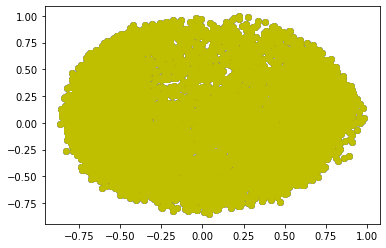

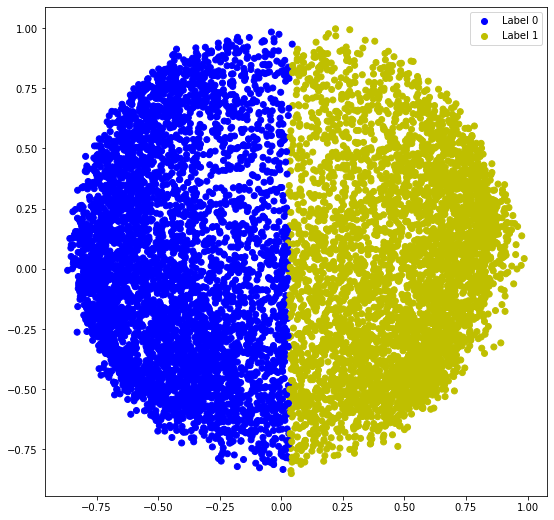

In [12]:

# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'
 
# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]
 
# Plotting the clustered scatter plot
 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
 
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

In [13]:

# Building the clustering model
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
 
# Training the model and Storing the predicted cluster labels
labels_nn = spectral_model_nn.fit_predict(X_principal)

In [14]:

# List of different values of affinity
affinity = ['rbf', 'nearest-neighbours']
 
# List of Silhouette Scores
s_scores = []
 
# Evaluating the performance
s_scores.append(silhouette_score(X, labels_rbf))
s_scores.append(silhouette_score(X, labels_nn))
 
print(s_scores)

[0.18129088036665159, 0.1824808141216655]
